#**NLP Assignment 1**
#**Multi-Dialect Intent Detection in Arab Banking Domain**

#**Acknowledgement**:
#Courtesy of Sir Haithem for sharing insights on NLP in a special lec. His code snippets have been a source to compose this code (NLP Lab 6/7)
# Also, the code uses **Google translator API** to add on an additional dialect of Egyptian Arabic (https://py-googletrans.readthedocs.io/en/latest/).Furthermore, the GitHub code for ArBanking77 dataset has been reused to carry out a comparative analysis of own models with that model.

#**1 Data Loading and Preprocessing**
### 1.1 Importing Libraries

In [ ]:
#pip install transformers

In [ ]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#from textblob_ar import TextBlob #To check the arabic spellings

### 1.2 Data Loading

In [ ]:
msa_dev = pd.read_csv("/content/drive/MyDrive/NLP/ArBanking77/MSA-Dev.csv")
msa_train = pd.read_csv("/content/drive/MyDrive/NLP/ArBanking77/MSA-Train.csv")
pal_dev = pd.read_csv("/content/drive/MyDrive/NLP/ArBanking77/PAL-Dev.csv")
pal_train = pd.read_csv("/content/drive/MyDrive/NLP/ArBanking77/PAL-Train.csv")

### 1.3 Visualizing Data

In [ ]:
msa_train.head()

,Query_ID_en,Query_en,Query_ID_MSA,Query_MSA,Intent_ID,Intent_en
0,1,I am still waiting on my card?,Tr10625,ما زلت أنتظر بطاقتي؟,1,card arrival
1,2,What can I do if my card still hasn't arrived ...,Tr10645,ماذا أفعل إذا لم تصل بطاقتي بعد أسبوعين؟,1,card arrival
2,3,I have been waiting over a week. Is the card s...,Tr10557,انا أنتظر منذ أكثر من أسبوع. هل ما زالت البطاق...,1,card arrival
3,4,Can I track my card while it is in the process...,Tr10724,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟,1,card arrival
4,5,"How do I know if I will get my card, or if it ...",Tr10591,كيف أعرف إذا ما كنت سأحصل على بطاقتي ، أو إذا ...,1,card arrival


In [ ]:
pal_dev.head()

,Query_ID_en,Query_en,Query_ID_PAL,Query_PAL,Intent_ID,Intent_en
0,1,I am still waiting on my card?,D2445,بعدني بستنى في البطاقة؟,1,card arrival
1,6,When did you send me my new card?,D2460,متى بعتتلي بطاقتي الجديدة؟,1,card arrival
2,11,Why has my new card still not come?,D2462,ليش بطاقتي لساتها ما اجت؟,1,card arrival
3,16,Will I be able to track the card that was sent...,D2450,بقدر أتتبع البطاقة الي انبعتتلي؟,1,card arrival
4,17,I don't have my card in 1 week. Should I be wo...,D2446,الها أسبوع بطاقتي مش معي، لازم أقلق؟,1,card arrival


In [ ]:
pal_train.head()

,Query_ID_en,Query_en,Query_ID_PAL,Query_PAL,Intent_ID,Intent_en
0,2,What can I do if my card still hasn't arrived ...,Tr21362,ايش بلزم اعمل اذا بطاقتي ما وصلت بعد اسبوعين؟,1,card arrival
1,3,I have been waiting over a week. Is the card s...,Tr21479,صارلي أكتر من أسبوعين بستنى، لساتها البطاقة جاية؟,1,card arrival
2,4,Can I track my card while it is in the process...,Tr21518,بقدر أتتبع بطاقتي وهي بعملية التسليم؟,1,card arrival
3,5,"How do I know if I will get my card, or if it ...",Tr21433,كيف بقدر أعرف اذا راح أخد بطاقتي ولا ضاعت؟,1,card arrival
4,7,Do you have info about the card on delivery?,Tr21536,عندكم معلومات عن بطاقة الدفع عند الاستلام؟,1,card arrival


#1.4 Additional Step: Introduction of Egypian Dialect:
###In order to make the model more versatile and diverse, this step has been done by translating (Query_MSA in MSA_Train) into Egyptian Dialect (Query_EGY) using the Google Translator API. The same has been saved in two new files for train and dev.


In [ ]:
pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=b160c70a628d117f4276f89cb0c4232003e79604fc67b45ad1be5022f3598a5d
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
from googletrans import Translator

# Define source and target languages
source_lang = 'ar'  # MSA Arabic
target_lang = 'arz'  # Egyptian Arabic

def translate_msa_to_egyptian(text):
  """
  Translates MSA to Egyptian Arabic using Google Translate API.
  """
  translator = Translator()
  try:
    translation = translator.translate(text, src=source_lang, dest=target_lang)
    return translation.text
  except ValueError as e:
    if "invalid destination language" in str(e):
      print(f"Error: Encountered issue with Google Translate. Language code '{target_lang}' might be invalid. Check documentation.")
    else:
      print(f"An error occurred during translation: {e}")
    return text  # Return original text in case of translation errors

# Load your MSA training data (assuming it's in a DataFrame named `msa_train`)
msa_train_copy = msa_train.copy()  # Create a copy to avoid modifying original data

# Add a new column for Egyptian Arabic queries
msa_train_copy['Query_EGY'] = msa_train_copy['Query_MSA'].apply(translate_msa_to_egyptian)

# Select and reorder desired columns
desired_columns = ['Query_MSA', 'Query_EGY', 'Intent_ID']
translated_train_df = msa_train_copy[desired_columns]

# Save the translated data to a separate CSV file
try:
  translated_train_df.to_csv("/content/drive/MyDrive/1NLP/Git-ArBanking77/data/egy.csv", index=False)
  print("MSA training data translated and saved with Egyptian Arabic queries!")
except Exception as e:
  print(f"Error saving translated data: {e}")



###1.5 Visualizing Available Features:

In [ ]:
print(msa_train.columns)
print(pal_train.columns)
print(msa_dev.columns)
print(pal_dev.columns)
#print(egy_train.columns)
#print(egy_dev.columns)


Index(['Query_ID_en', 'Query_en', 'Query_ID_MSA', 'Query_MSA', 'Intent_ID',
       'Intent_en'],
      dtype='object')
Index(['Query_ID_en', 'Query_en', 'Query_ID_PAL', 'Query_PAL', 'Intent_ID',
       'Intent_en'],
      dtype='object')
Index(['Query_ID_en', 'Query_en', 'Query_ID_MSA', 'Query_MSA', 'Intent_ID',
       'Intent_en'],
      dtype='object')
Index(['Query_ID_en', 'Query_en', 'Query_ID_PAL', 'Query_PAL', 'Intent_ID',
       'Intent_en'],
      dtype='object')


### 1.6 **Data Concatenation:**
The above query shows that the columns are the same for all of these datasets. So, these can be merged in order to make a larger dataset for diverse training on more examples for better generalization.**

In [ ]:
'''
Training one model on two separate datasets is known as domain adaptation or multi-domain learning. This can be useful if the datasets represent different dialects
or variations within the same domain. However, merging datasets may be beneficial, especially if there are similarities between the domains or if
we have a limited amount of data in each domain. Training on a larger, merged dataset can help the model learn more generalized patterns and improve its performance overall.
'''
#Therefore, merging training datasets and test(dev) datasets:
# Merge training datasets
# Select specific columns from train datasets
df = pd.concat([
    msa_train[['Query_MSA', 'Intent_ID']].rename(columns={'Query_MSA': 'Query', 'Intent_ID': 'Intent_ID'}),
    pal_train[['Query_PAL', 'Intent_ID']].rename(columns={'Query_PAL': 'Query', 'Intent_ID': 'Intent_ID'})
    pal_train[['Query_Egy', 'Intent_ID']].rename(columns={'Query_Egy': 'Query', 'Intent_ID': 'Intent_ID'})
], ignore_index=True)

# Select specific columns from dev datasets
dev = pd.concat([
    msa_dev[['Query_MSA', 'Intent_ID']].rename(columns={'Query_MSA': 'Query', 'Intent_ID': 'Intent_ID'}),
    pal_dev[['Query_PAL', 'Intent_ID']].rename(columns={'Query_PAL': 'Query', 'Intent_ID': 'Intent_ID'})
    pal_dev[['Query_Egy', 'Intent_ID']].rename(columns={'Query_Egy': 'Query', 'Intent_ID': 'Intent_ID'})
], ignore_index=True)

# Save the merged datasets into files
df.to_csv("/content/drive/MyDrive/NLP/Git-ArBanking77/data/train.csv", index=False)
dev.to_csv("/content/drive/MyDrive/NLP/Git-ArBanking77/data/dev.csv", index=False)


**Visualizing the concatenated data: The respective primary keys for each dataset has been maintained in separate columns to keep track if necessary. The common fields have been merged i.e. query_en, query_msa, and query_pal**

In [ ]:
df.head()

,Query,Intent_ID
0,ما زلت أنتظر بطاقتي؟,1
1,ماذا أفعل إذا لم تصل بطاقتي بعد أسبوعين؟,1
2,انا أنتظر منذ أكثر من أسبوع. هل ما زالت البطاق...,1
3,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟,1
4,كيف أعرف إذا ما كنت سأحصل على بطاقتي ، أو إذا ...,1


In [ ]:
df.tail()


,Query,Intent_ID
21549,لازم أأكد هويتي. شو الي لازم اساويه؟,76
21550,شو اشكال الهوية الي بتزبط للتحقق؟,76
21551,ايش المطلوب للتأكد من الهوية؟,76
21552,للتأكد من الهوية ايش نوع المستندات اللي بحتاجهم؟,76
21553,أنا عايشة في البرتغال . بتشتغل هون؟,77


###**Changing to Lower Case**
###Lowering the case is not required here, because, the Arabic language does not need that. However, its code has been offered below **only for demonstration of the process**.

In [ ]:
#df['Query_en'] = df['Query_en'].apply(lambda x:" ".join(x.lower() for x in x.split()))
#df['Query'] = df['Intent_en'].apply(lambda x:" ".join(x.lower() for x in x.split()))

###**1.7 Handling the Punctuations:**
###**It is worth mentioning that the arabic set of punctioantions are slightly different: e.g. the question mark in Arabic faces right (؟) as opposite to the one in English (?)** In order to remove all of such unnecessary symbols and **punctuations**, let us use Regex:

In [ ]:
'''
df['Query_MSA'] = df['Query_MSA'].str.replace('[^\w\s]',' ')
df['Query_PAL'] = df['Query_PAL'].str.replace('[^\w\s]',' ')
df['Query_en'] = df['Query_en'].str.replace('[^\w\s]',' ')
df['Intent_en'] = df['Intent_en'].str.replace('[^\w\s]',' ')
'''
df['Query'] = df['Query'].str.replace('[^\w\s]',' ')


###**1.8 Removing the stopwords from the Arabic Queries feature**:
###**Arabic list of stopwords** has specially been used for this step

In [ ]:
# Define stopwords
stop_words_ar = set(stopwords.words('arabic'))
#stop_words_en = set(stopwords.words('english'))

In [ ]:
df['Query'] = df['Query'].apply(lambda x:" ".join(x for x in x.split() if x not in stop_words_ar))
#df['Intent_en'] = df['Intent_en'].apply(lambda x:" ".join(x for x in x.split() if x not in stop_words_en))

In [ ]:
print(type(df['Query']))


<class 'pandas.core.series.Series'>


###**1.9 Handling Numerical Values**

In [ ]:
# Replacing numerical values with a special token (if present)
df['Query'] = df['Query'].apply(lambda x: re.sub(r'\d+', 'NUM', x))

###**1.11 Correction of Spellings:**

##Although the spelling correction can be performed on the arabic text (sample code below for English), however, it has purposely been avoided so that the sanctity of arabic dialects remains intact. **Since, the spellings for each dialect vary**, thus, using standard MSA spellings might spoil the data. **This can be more clarified by the table below** which represents the different between various arabic dialects: (Source: BayanTech: https://bayan-tech.com/blog/arabic-dialects-translation/)
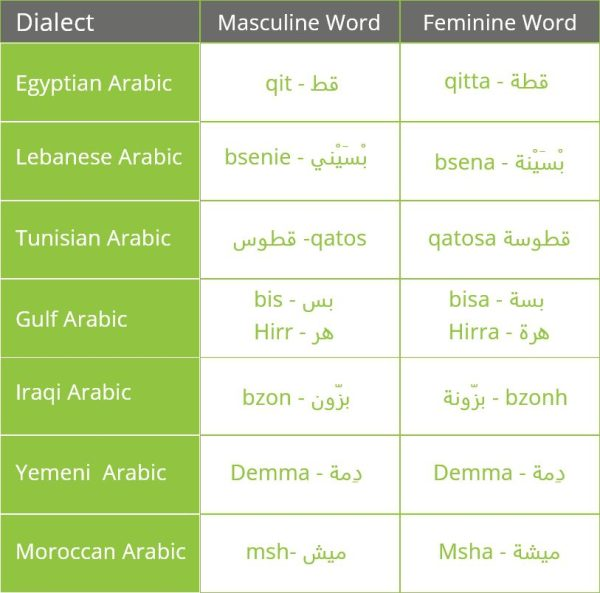

###However, following **code for the correction of spellings is being presented for demonstration purpose**:-

In [ ]:
# Spell Correction - May take some time to complete running
# Perform spell correction using TextBlob
#df['Query'] = df['Query'].apply(lambda x: str(TextBlob(x).correct()))

###**1.12 Removing Repeated Characters**
This step could be done using code below, however, as in the above pic, few dialects may get disturbed by this step. So, it will nt be used.

In [ ]:
'''
def de_repeat(text):
  pattern = re.compile(r"(.)\1{2,}")
  return pattern.sub(r"\1\1", text)

df['Query'] = df['Query'].apply(lambda x: " ".join(de_repeat(x) for word in x.split()))
'''

### **1.13 Lemmatization:**
As many as three Lemmatizers have been tried to check the best. However, the only working lemmatizer for Arabic was found to be **Stanza Lemmatizer**

In [ ]:
pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.4/970.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 15.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [ ]:
#'''
import stanza

# Download the Arabic resources for Stanza
stanza.download('ar')

# Initialize Stanza pipeline for Arabic
nlp = stanza.Pipeline('ar')

# Define a function to perform lemmatization on a single text
def lemmatize_text(text):
    # Lemmatize each word in the text and join them back into a string
    doc = nlp(text)
    return ' '.join([word.lemma for sent in doc.sentences for word in sent.words])

# Apply lemmatization to the 'Query' column in the DataFrame
df['Query'] = df['Query'].apply(lemmatize_text)
dev['Query'] = dev['Query'].apply(lemmatize_text)
#'''

In [ ]:
pip install farasa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 42.7 MB/s eta 0:00:00


In [ ]:
from farasa.pos import FarasaPOSTagger
from farasa.lemma import FarasaLemmatizer
import pandas as pd

# Initialize Farasa POS tagger and Lemmatizer
farasa_pos = FarasaPOSTagger(interactive=True)
farasa_lemma = FarasaLemmatizer(interactive=True)

# Lemmatization function using Farasa
def farasa_lemmatize(text):
    pos_tags = farasa_pos.tag(text)
    lemmas = farasa_lemma.lemmatize(text)
    return lemmas

# Apply lemmatization to the 'Query' feature of the DataFrame
df['Farasa_Lemmas'] = df['Query'].apply(farasa_lemmatize)

# Print the DataFrame with Farasa lemmatized tokens
print(df)

In [ ]:
pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 726.1 kB/s eta 0:00:00


In [ ]:
from pyarabic.araby import strip_tashkeel, tokenize, lemmatize
import pandas as pd

# Lemmatization function using PyArabic
def pyarabic_lemmatize(text):
    tokens = tokenize(strip_tashkeel(text))
    lemmas = [lemmatize(token) for token in tokens]
    return lemmas

# Apply lemmatization to the 'Query' feature of the DataFrame
df['PyArabic_Lemmas'] = df['Query'].apply(pyarabic_lemmatize)

# Print the DataFrame with PyArabic lemmatized tokens
print(df)


### **1.14 Tokenization**

In [ ]:
# Tokenize each element in the Series and remove punctuation
df['Query'] = df['Query'].apply(lambda x: [token for token in word_tokenize(str(x))])

### **1.15 Vectorization of Data**

###TF-IDF Vetorizer has been used for this purpose.

In [ ]:
#'''
#df['Query_en_str'] = df['Query'].apply(lambda x: ' '.join(x))
df['Query'] = df['Query'].apply(lambda x: ' '.join(x))
#df['Query_PAL_str'] = df['Query_PAL'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data for English queries
#X_en_tfidf = tfidf_vectorizer.fit_transform(df['Query_en_str'])

# Fit and transform the preprocessed text data for MSA queries
X_tfidf = tfidf_vectorizer.fit_transform(df['Query'])

# Fit and transform the preprocessed text data for Palestinian queries
#X_pal_tfidf = tfidf_vectorizer.fit_transform(df['Query_PAL_str'])
#'''

In [ ]:
X = df.drop('Intent_ID', axis=1)
y = df['Intent_ID']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#'''
# Load the pre-trained mBERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Load the pre-trained mBERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')
#'''

##**2 Development of Models**
### As many as three models have been tried in this context. These include: **mBERT, AraBERT (specific for Arabic language modeling),** and **ArBanking77** model (from GitHUB **Courtesy: Team - Arbanking77 Dataset**).

### **2.1 mBERT Model**

In [ ]:
#'''
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, DataLoader, RandomSampler

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Function to prepare and encode data (reusable for all languages)
def prepare_and_encode_data(data_column):
  encoded_data = tokenizer(data_column.tolist(), padding=True, truncation=True, max_length=32, return_tensors='pt')
  # Directly access required elements from tokenizer output
  input_ids = encoded_data['input_ids']
  attention_mask = encoded_data['attention_mask']
  return TensorDataset(input_ids, attention_mask)

# Prepare data for English queries
queries_arabic = prepare_and_encode_data(df['Query'])

# Prepare data for MSA queries
#encoded_inputs_msa = prepare_and_encode_data(df['Query'])

# Prepare data for Palestinian queries
#encoded_inputs_pal = prepare_and_encode_data(df['Query'])

# Initialize the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=len(df['Intent_ID'].unique()))

# Define training function (reusable for all languages)
def train_model(encoded_data, labels, batch_size=8, lr=5e-5, epochs=1):
  # Create random sampler for shuffling data
  sampler = RandomSampler(encoded_data)
  train_dataloader = DataLoader(encoded_data, sampler=sampler, batch_size= 64)  #batch size has been set as 64 to keep it comparable with the Al Jarrar's work which is 64

  optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

  # Reshape labels to match the size of each batch
  labels = labels.unsqueeze(1).repeat(1, batch_size // labels.shape[0] + 1)[:len(train_dataloader.dataset)]

  for epoch in range(epochs):
    model.train()
    for batch in train_dataloader:
      optimizer.zero_grad()
      # Directly access input and attention mask from batch
      batch_input_ids, batch_attention_mask = batch
      outputs = model(batch_input_ids, attention_mask=batch_attention_mask, labels=labels[:len(batch_input_ids)])
      loss = outputs.loss
      loss.backward()
      optimizer.step()

# Fine-tune the model on English queries
train_model(queries_arabic, torch.tensor(df['Intent_ID'].tolist()), batch_size=16, lr=2e-5, epochs=1)

# Fine-tune the model on MSA queries
#train_model(encoded_inputs_msa, torch.tensor(df['Intent_ID'].tolist()), batch_size=16, lr=2e-5, epochs=3)

# Fine-tune the model on Palestinian queries
#train_model(encoded_inputs_pal, torch.tensor(df['Intent_ID'].tolist()), batch_size=16, lr=2e-5, epochs=3)

# Function to evaluate model (reusable for all languages)
def evaluate_model(encoded_data):
  model.eval()
  eval_dataset = encoded_data
  eval_dataloader = DataLoader(eval_dataset, batch_size=8)  # Adjust batch size as needed

  predictions = []
  with torch.no_grad():
    for batch in eval_dataloader:
      # Directly access input and attention mask from batch
      batch_input_ids, batch_attention_mask = batch
      outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
      predictions.extend(outputs.logits.argmax(dim=1).tolist())

  return predictions

# Evaluate the model on English queries
predictions_en = evaluate_model(queries_arabic)

# Evaluate the model on MSA queries
#predictions_msa = evaluate_model(encoded_inputs_msa)

# Evaluate the model on Palestinian queries
#predictions_pal = evaluate_model(encoded_inputs_pal)

# Print classification reports for each language
print("Classification Report for Arabic Queries:")
print(classification_report(df['Intent_ID'].tolist(), predictions_en))

#print("Classification Report for MSA Queries:")
#print(classification_report(df['Intent_ID'].tolist(), predictions_msa))

#print("Classification Report for Palestinian Queries:")
#print(classification_report(df['Intent_ID'].tolist(), predictions_pal))

#'''


###**2.2 AraBERT Model**


In [ ]:
!pip install transformers sentencepiece arabic
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [ ]:
#'''
model_name = "aubmindlab/bert-base-arabertv2"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model (for sequence classification)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
#'''

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#'''
def preprocess_text(text):
  """
  Preprocesses text for AraBERT.

  Args:
      text: Text string to be preprocessed.

  Returns:
      A dictionary containing the following keys:
          input_ids: List of token IDs.
          attention_mask: List of 1s for tokens and 0s for padding.
  """
  # Apply any additional preprocessing steps you might have (e.g., stop word removal)
  # ...

  # Tokenize the text
  encoded_text = tokenizer(text, truncation=True, padding="max_length")

  # Extract input IDs and attention mask
  input_ids = encoded_text["input_ids"]
  attention_mask = encoded_text["attention_mask"]

  return {"input_ids": input_ids, "attention_mask": attention_mask}
#'''

Installation of Requisite Libraries

In [ ]:
pip install accelerate -U

In [ ]:
pip install transformers[torch]

In [ ]:
pip show transformers

In [ ]:
pip show accelerate

In [ ]:
#'''
from transformers import Trainer, TrainingArguments

# Define training arguments (learning rate, epochs, etc.)
training_args = TrainingArguments(
    output_dir="./results",  # Output directory for checkpoints
    per_device_train_batch_size=32,  #  batch size
    num_train_epochs=3  #training epochs
)

# Prepare training and validation datasets (using preprocessed data)
# ...

# Define a Trainer object for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset= df['Query'],
    eval_dataset= dev['Query']
)

# Train the AraBERT model
trainer.train()
#'''

### **ArBanking77 Model**
Source: GitHUB

###Importing the Model

In [ ]:
#!git clone https://github.com/SinaLab/ArBanking77.git

In [ ]:
!pwd

/content/drive/MyDrive/1NLP/Git-ArBanking77


In [ ]:
cd /content/drive/MyDrive/1NLP/Git-ArBanking77

In [ ]:
cd src

/content/drive/MyDrive/1NLP/Git-ArBanking77/src


###Installation of Requirements and Libraries

In [7]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [6]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00


In [7]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00


In [8]:
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

###Naivation to Respective Folder:
###Note: The GitHub code has been copied to a folder in my Google Drive and has been accessed from there.

In [1]:
!pwd

/content


In [2]:
cd drive/MyDrive/NLP/Git-ArBanking77

/content/drive/MyDrive/NLP/Git-ArBanking77


In [3]:
ls

data/  LICENSE  outputs/  README.md  requirements.txt  src/


###**Running the Model** Explicitly (Using Python Interpreter)
### Note: **20 Epochs (0-19)** have been used to train and evaluate the model.

In [11]:
!python ./src/run_glue_no_trainer.py --model_name_or_path aubmindlab/bert-base-arabertv02 --train_file ./data/Banking77_Arabized_MSA_PAL_train_sample.csv --validation_file ./data/Banking77_Arabized_MSA_PAL_val_sample.csv --seed 42 --max_length 128 --learning_rate 4e-5 --num_train_epochs 20 --per_device_train_batch_size 64 --output_dir ./outputs/models

2024-04-12 09:53:33.816626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 09:53:33.816702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 09:53:33.867565: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 09:53:36.669262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/12/2024 09:53:48 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cpu

Mixed precision type: no

Generating train split: 1078 examples [00:00, 18898.63 examples/s]
Generating

In [9]:
!python ./src/run_glue_no_trainer_eval.py --model_name_or_path ./outputs/models --validation_file ./data/Banking77_Arabized_MSA_test_sample.csv --seed 42 --per_device_eval_batch_size 64 --results_dir ./outputs/results --log_path ./outputs/logs/log.txt

2024-04-12 19:04:07.760167: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 19:04:07.760267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 19:04:07.761986: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 19:04:09.265342: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/12/2024 19:04:10` - INFO - __main__ -   Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cpu

Mixed precision type: no

Generating validation split: 179 examples [00:00, 4210.63 examples/s]
load

###**Performance Evaluation:**
### 2 evaluation matrices have been used for this purpose:
**1. Accuracy**

**2. F-1 Score**

Both of these parameters have been measured on both training and evaluation sets.

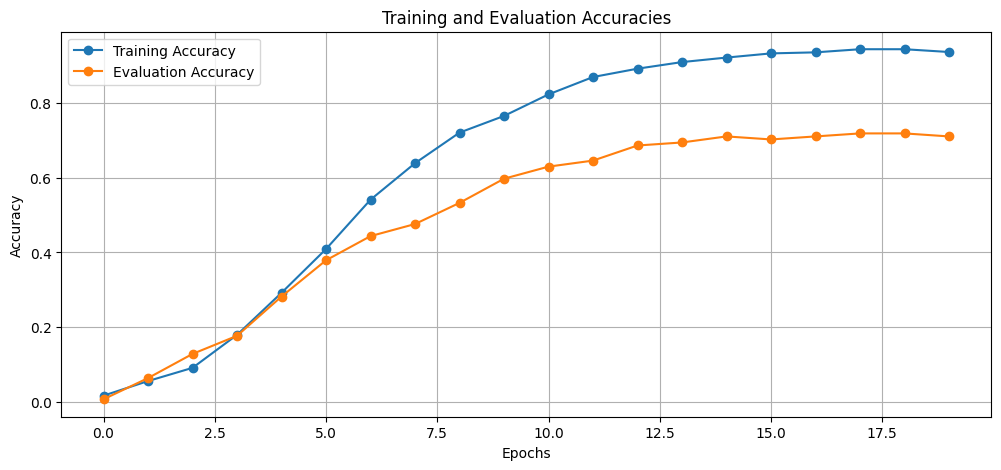

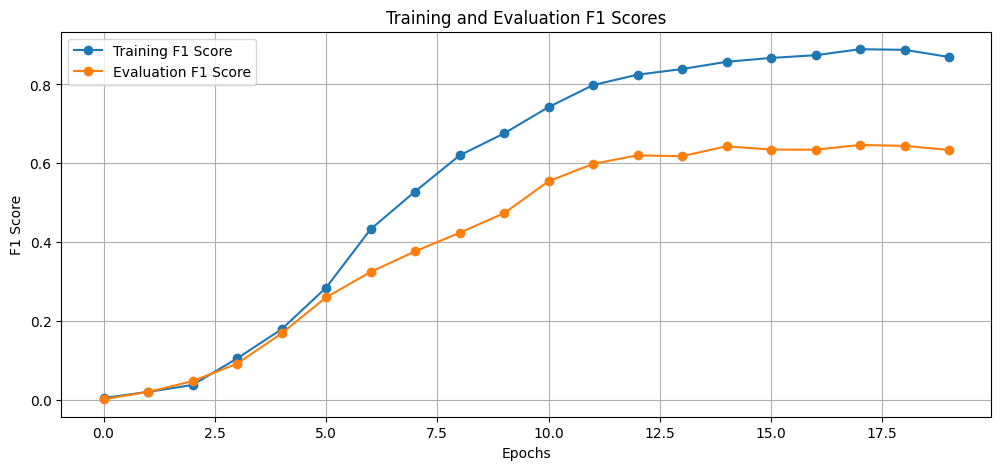

In [7]:
#Output Lists for accuracy (training and evaluation), and F-1 Score (training and Evaluation)):
acc_trg = [(0, 0.01763),(1,0.05659),(2, 0.09184),(3,0.17996),(4, 0.29221),(5, 0.40909),(6, 0.54082),(7,0.63822),(8, 0.71985),(9,0.76438),
(10, 0.82189), (11, 0.86827), (12, 0.89054), (13,0.90816), (14,0.92022), (15, 0.93135), (16, 0.93414), (17,0.94249), (18, 0.94249), (19,0.93506)]

acc_eval = [(0, 0.00806),(1,0.06452),(2, 0.12903),(3,0.17742),(4, 0.28226),(5,0.37903),(6, 0.44355),(7,0.47581),(8, 0.53226),(9,0.59677),
    (10, 0.62903), (11, 0.64516), (12, 0.68548), (13,0.69355), (14, 0.70968), (15,0.70161), (16, 0.70968), (17,0.71774), (18, 0.71774), (19, 0.70968)]

f1_trg = [(0, 0.00460),(1,0.01997),(2, 0.03758),(3,0.10480),(4, 0.17882),(5,0.28413),(6, 0.43257),(7,0.52836),(8, 0.61979),(9,0.67574),
    (10,0.74246), (11,0.79832), (12, 0.82469), (13, 0.83900), (14, 0.85740), (15, 0.86724), (16, 0.87411), (17, 0.88932), (18, 0.88778), (19, 0.86965)]

f1_eval = [(0, 0.00142),(1,0.01997),(2, 0.04723),(3,0.09154),(4, 0.16840),(5, 0.25965),(6, 0.32425),(7,0.37650),(8, 0.42353),(9,0.47321), (10, 0.55430), (11, 0.59845), (12, 0.62009), (13,0.61787), (14,0.64304), (15, 0.63475), (16, 0.63440), (17, 0.64648), (18, 0.64410), (19, 0.63385)]


# Extracting x (epoch number) and y (accuracy) values from the tuples
epochs_trg, accuracies_trg = zip(*acc_trg)
epochs_eval, accuracies_eval = zip(*acc_eval)

# Extracting x (epoch number) and y (F1 score) values from the tuples
epochs_f1_trg, f1_scores_trg = zip(*f1_trg)
epochs_f1_eval, f1_scores_eval = zip(*f1_eval)

# Plotting the training and evaluation accuracies
plt.figure(figsize=(12, 5))
plt.plot(epochs_trg, accuracies_trg, label='Training Accuracy', marker='o')
plt.plot(epochs_eval, accuracies_eval, label='Evaluation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Evaluation Accuracies')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training and evaluation F1 scores
plt.figure(figsize=(12, 5))
plt.plot(epochs_f1_trg, f1_scores_trg, label='Training F1 Score', marker='o')
plt.plot(epochs_f1_eval, f1_scores_eval, label='Evaluation F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Evaluation F1 Scores')
plt.legend()
plt.grid(True)
plt.show()

